In [60]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

In [102]:
nb_classes = 10

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

W_hist = tf.summary.histogram("weight", W)
b_hist = tf.summary.histogram("bias", b)

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, 
                                                labels=Y)
cost = tf.reduce_mean(cost_i)
cost_summ = tf.summary.scalar("cost", cost)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
acc_summ = tf.summary.scalar("accuracy", accuracy)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [103]:
training_epochs = 150
batch_size = 100

writer = tf.summary.FileWriter('./logs/MNIST_ML')

sess = tf.Session()

writer.add_graph(sess.graph)
sess.run(tf.global_variables_initializer())
# tf.reset_default_graph()
summary = tf.summary.merge([cost_summ, w_hist,])

global_step = 1
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        c, a, s, _ = sess.run([cost, accuracy, summary, optimizer], feed_dict={X: xs, Y: ys})
        avg_cost += c / total_batch
        writer.add_summary(s, global_step=global_step)
        global_step += 1
    
    if epoch % 10 == 0:
        print('Epoch: ', '%04d' % (epoch + 1), '\tcost = ', '{:.6f}'.format(avg_cost), '\taccuracy :', '{:.9f}'.format(a))

Epoch:  0001 	cost =  2.749032 	accuracy : 0.730000019
Epoch:  0011 	cost =  0.525497 	accuracy : 0.889999986
Epoch:  0021 	cost =  0.424241 	accuracy : 0.970000029
Epoch:  0031 	cost =  0.377266 	accuracy : 0.870000005
Epoch:  0041 	cost =  0.348691 	accuracy : 0.949999988
Epoch:  0051 	cost =  0.328876 	accuracy : 0.910000026
Epoch:  0061 	cost =  0.314175 	accuracy : 0.949999988
Epoch:  0071 	cost =  0.302689 	accuracy : 0.939999998
Epoch:  0081 	cost =  0.293930 	accuracy : 0.879999995
Epoch:  0091 	cost =  0.286744 	accuracy : 0.879999995
Epoch:  0101 	cost =  0.280727 	accuracy : 0.970000029
Epoch:  0111 	cost =  0.275594 	accuracy : 0.920000017
Epoch:  0121 	cost =  0.271332 	accuracy : 0.939999998
Epoch:  0131 	cost =  0.267481 	accuracy : 0.939999998
Epoch:  0141 	cost =  0.264232 	accuracy : 0.920000017


In [104]:
print("Accuracy: ", accuracy.eval(session=sess,
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.9207


Label:  [6]
Prediction:  [6]
Result:  [ True]


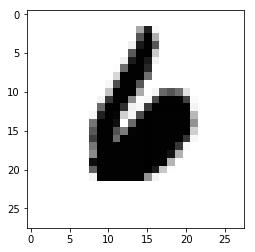

In [105]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))
print("Result: ", sess.run(tf.equal(sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)), sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))))
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [10]:
nb_classes = 10
neurons = 10

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, neurons]), name='weight1')
b1 = tf.Variable(tf.random_normal([neurons]), name='bias1')
logits1 = tf.matmul(X, W1) + b1
layer1 = tf.nn.softmax(logits1)

W1_hist = tf.summary.histogram("W1", W1)
b1_hist = tf.summary.histogram("b1", b1)
layer1_hist = tf.summary.histogram("layer1", layer1)

W2 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight2')
b2 = tf.Variable(tf.random_normal([neurons]), name='bias3')
logits2 = tf.matmul(layer1, W2) + b2
layer2 = tf.nn.softmax(logits2)

W2_hist = tf.summary.histogram("W2", W2)
b2_hist = tf.summary.histogram("b2", b2)
layer2_hist = tf.summary.histogram("layer2", layer2)

W3 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight3')
b3 = tf.Variable(tf.random_normal([neurons]), name='bias3')
logits3 = tf.matmul(layer2, W3) + b3
layer3 = tf.nn.softmax(logits3)

W1_hist = tf.summary.histogram("W3", W3)
b1_hist = tf.summary.histogram("b3", b3)
layer1_hist = tf.summary.histogram("layer3", layer3)

W4 = tf.Variable(tf.random_normal([neurons, nb_classes]), name='weight4')
b4 = tf.Variable(tf.random_normal([nb_classes]), name='bias4')

logits4 = tf.matmul(layer3, W4) + b4
hypothesis = tf.nn.softmax(logits4)

W4_hist = tf.summary.histogram("W4", W4)
b4_hist = tf.summary.histogram("b4", b4)
hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits4, 
                                                labels=Y)
cost = tf.reduce_mean(cost_i)

cost_summ = tf.summary.scalar("cost", cost)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [21]:
training_epochs = 150
batch_size = 100

merge()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    
    if epoch % 10 == 0:
        print('Epoch: ', '%04d' % (epoch + 1), '\tcost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 	cost =  2.529995067


KeyboardInterrupt: 

In [12]:
print("Accuracy: ", accuracy.eval(session=sess,
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.488


Label:  [3]
Prediction:  [3]
Result:  [ True]


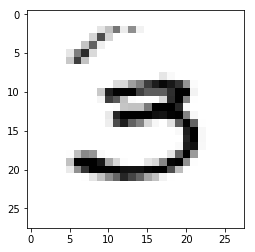

In [13]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))
print("Result: ", sess.run(tf.equal(sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)), sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))))
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

### NN/Sigmoid

In [110]:
nb_classes = 10
neurons = 100

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, neurons]), name='weight1')
b1 = tf.Variable(tf.random_normal([neurons]), name='bias1')
logits1 = tf.matmul(X, W1) + b1
layer1 = tf.sigmoid(logits1)

W2 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight2')
b2 = tf.Variable(tf.random_normal([neurons]), name='bias3')
logits2 = tf.matmul(layer1, W2) + b2
layer2 = tf.sigmoid(logits2)

W3 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight3')
b3 = tf.Variable(tf.random_normal([neurons]), name='bias3')
logits3 = tf.matmul(layer2, W3) + b3
layer3 = tf.sigmoid(logits3)

W4 = tf.Variable(tf.random_normal([neurons, nb_classes]), name='weight4')
b4 = tf.Variable(tf.random_normal([nb_classes]), name='bias4')

logits4 = tf.matmul(layer3, W4) + b4
hypothesis = tf.nn.softmax(logits4)

sig_W4_hist = tf.summary.histogram("W4", W4)
sig_b4_hist = tf.summary.histogram("b4", b4)
sig_hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits4, 
                                                labels=Y)
cost = tf.reduce_mean(cost_i)
sig_cost_summ = tf.summary.scalar("cost", cost)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [112]:
training_epochs = 15
batch_size = 100

sess = tf.Session()
summary = tf.summary.merge([sig_W4_hist, sig_b4_hist, sig_hypothesis_hist, sig_cost_summ])
train_writer = tf.summary.FileWriter('./logs/MNIST_sigDNN', sess.graph)
sess.run(tf.global_variables_initializer())


global_step = 0
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        s, c, _ = sess.run([summary, cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        train_writer.add_summary(s, global_step=global_step)
        avg_cost += c / total_batch
        global_step += 1
        
    if epoch % 10 == 0:
        print('Epoch: ', '%04d' % (epoch + 1), '\tcost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 	cost =  1.001210188
Epoch:  0011 	cost =  0.211217490


In [113]:
print("Accuracy: ", accuracy.eval(session=sess,
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.9282


Label:  [4]
Prediction:  [4]
Result:  [ True]


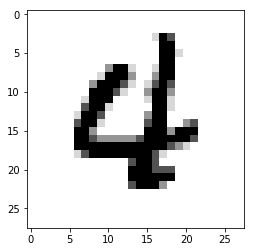

In [114]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))
print("Result: ", sess.run(tf.equal(sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)), sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))))
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

### DNN/ReLU - fail

In [147]:
nb_classes = 10
neurons = 100

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, neurons]), name='weight1')
b1 = tf.Variable(tf.random_normal([neurons]), name='bias1')
logits1 = tf.matmul(X, W1) + b1
layer1 = tf.nn.relu(logits1)

W2 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight2')
b2 = tf.Variable(tf.random_normal([neurons]), name='bias3')
logits2 = tf.matmul(layer1, W2) + b2
layer2 = tf.nn.relu(logits2)

W3 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight3')
b3 = tf.Variable(tf.random_normal([neurons]), name='bias3')
logits3 = tf.matmul(layer2, W3) + b3
layer3 = tf.nn.relu(logits3)


#W4 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight4')
W4 = tf.Variable(tf.random_normal([neurons, nb_classes]), name='weight4')
#b4 = tf.Variable(tf.random_normal([neurons]), name='bias4')
b4 = tf.Variable(tf.random_normal([nb_classes]), name='bias4')
logits4 = tf.matmul(layer3, W4) + b4
#layer4 = tf.nn.relu(logits4)
hypothesis = logits4
'''
W5 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight5')
b5 = tf.Variable(tf.random_normal([neurons]), name='bias5')
logits5 = tf.matmul(layer4, W5) + b5
layer5 = tf.nn.relu(logits5)

W6 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight6')
b6 = tf.Variable(tf.random_normal([neurons]), name='bias6')
logits6 = tf.matmul(layer4, W5) + b5
layer6 = tf.nn.relu(logits5)

W7 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight7')
b7 = tf.Variable(tf.random_normal([neurons]), name='bias7')
logits7 = tf.matmul(layer5, W6) + b6
layer7 = tf.nn.relu(logits6)

W8 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight8')
b8 = tf.Variable(tf.random_normal([neurons]), name='bias8')
logits8 = tf.matmul(layer6, W7) + b7
layer8 = tf.nn.relu(logits7)

W9 = tf.Variable(tf.random_normal([neurons, neurons]), name='weight9')
b9 = tf.Variable(tf.random_normal([neurons]), name='bias9')
logits9 = tf.matmul(layer8, W9) + b9
layer9 = tf.nn.relu(logits9)

W10 = tf.Variable(tf.random_normal([neurons, nb_classes]), name='weight10')
b10 = tf.Variable(tf.random_normal([nb_classes]), name='bias10')
logits10 = tf.matmul(layer9, W10) + b10
hypothesis = logits10
'''


#relu_W4_hist = tf.summary.histogram("W4", W4)
#relu_b4_hist = tf.summary.histogram("b4", b4)
#relu_hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, 
                                                labels=Y)
cost = tf.reduce_mean(cost_i)
relu_cost_summ = tf.summary.scalar("cost", cost)

optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
training_epochs = 150
batch_size = 100

sess = tf.Session()
summary = tf.summary.merge([relu_cost_summ])
train_writer = tf.summary.FileWriter('./logs/MNIST_reluDNN', sess.graph)
sess.run(tf.global_variables_initializer())


global_step = 0
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        s, c, _ = sess.run([summary, cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        train_writer.add_summary(s, global_step=global_step)
        avg_cost += c / total_batch
        global_step += 1
        
    if epoch % 10 == 0:
        print('Epoch: ', '%04d' % (epoch + 1), '\tcost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 	cost =  81.246773287
Epoch:  0011 	cost =  0.729211349
Epoch:  0021 	cost =  1.908647899
Epoch:  0031 	cost =  1.848427754
Epoch:  0041 	cost =  1.847590165
Epoch:  0051 	cost =  1.845671417
Epoch:  0061 	cost =  1.845008698
Epoch:  0071 	cost =  1.847287672


In [ ]:
print("Accuracy: ", accuracy.eval(session=sess,
                                 feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

In [ ]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))
print("Result: ", sess.run(tf.equal(sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)), sess.run(tf.argmax(hypothesis, 1),
                              feed_dict={X: mnist.test.images[r:r+1]}))))
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()